In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
conv_base.trainable = False

In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/dogsvscats/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/dogsvscats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/tmp/ipykernel_27/4146946750.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 208s 320ms/step - loss: 0.3341 - accuracy: 0.8552 - val_loss: 0.2834 - val_accuracy: 0.8822
Epoch 2/10
625/625 [==============================] - 143s 229ms/step - loss: 0.2654 - accuracy: 0.8838 - val_loss: 0.2494 - val_accuracy: 0.8914
Epoch 3/10
625/625 [==============================] - 140s 223ms/step - loss: 0.2500 - accuracy: 0.8958 - val_loss: 0.3043 - val_accuracy: 0.8700
Epoch 4/10
625/625 [==============================] - 139s 223ms/step - loss: 0.2337 - accuracy: 0.8991 - val_loss: 0.2322 - val_accuracy: 0.9046
Epoch 5/10
625/625 [==============================] - 139s 222ms/step - loss: 0.2178 - accuracy: 0.9046 - val_loss: 0.2364 - val_accuracy: 0.9056
Epoch 6/10
625/625 [==============================] - 137s 219ms/step - loss: 0.2094 - accuracy: 0.9107 - val_loss: 0.2527 - val_accuracy: 0.8956
Epoch 7/10
625/625 [==============================] - 137s 220ms/step - loss: 0.1968 - accuracy: 0.9164 - val_loss: 0.2216 -

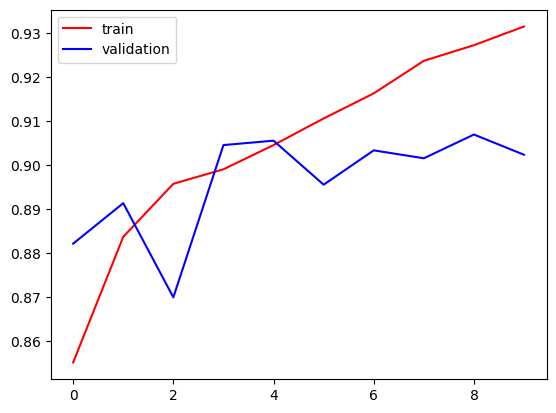

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

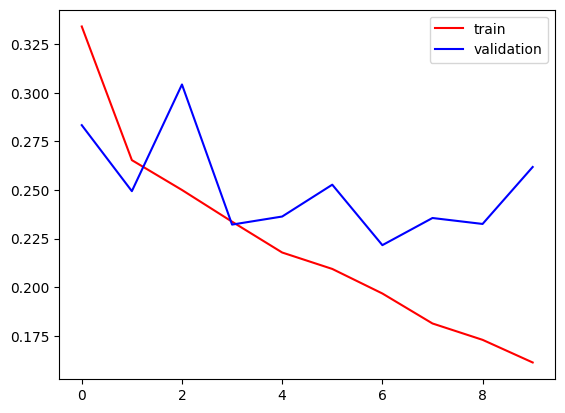

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()